## Detect particles

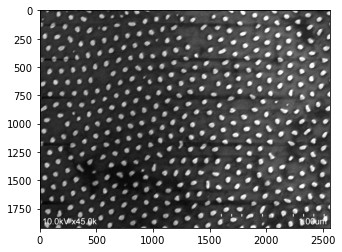

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy as sp
import scipy.spatial
import scipy.spatial.distance as distance

img = cv2.imread('C:\\Users\\wklee\Desktop\\python projects\\project 5 - detect circular particles in image\\30-1_q008.tif', 0)
img = cv2.medianBlur(img, 5)
plt.imshow(img, cmap='gray')
plt.show()




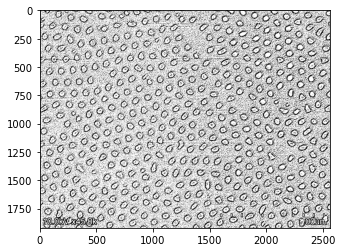

In [73]:
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 11, 2.5)
plt.imshow(th3, 'gray')
plt.show()

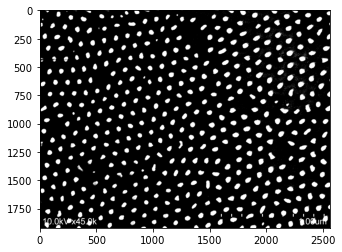

In [27]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('C:\\Users\\wklee\Desktop\\python projects\\project 5 - detect circular particles in image\\30-1_q008.tif', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.cv2.THRESH_BINARY + cv2.THRESH_OTSU)



plt.imshow(thresh3,'gray',vmin=0,vmax=255)
plt.show()

#### 找出每一個點的x, y座標 - 參考程式 : https://stackoverflow.com/questions/72118665/particle-detection-with-python-opencv

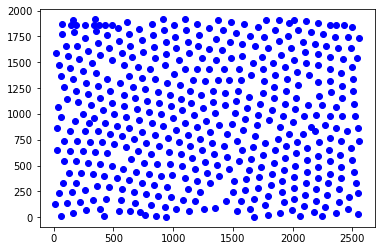

In [28]:
original = img.copy()
# Find contours, remove tiny specs using contour area filtering, gather points
points_list = []
size_list = []
cnts, _ = cv2.findContours(thresh3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
AREA_THRESHOLD = 300  # 透過area threshold篩選掉較小的顆粒
for c in cnts:
    area = cv2.contourArea(c)
    if area < AREA_THRESHOLD:
        cv2.drawContours(thresh3, [c], -1, 0, -1)
    else:
        (x, y), radius = cv2.minEnclosingCircle(c)
        points_list.append((int(x), int(y)))
        size_list.append(area)

x_coordinate_list = []
y_coordinate_list = []
total_coordinate = []
for ele in points_list:
    x_coordinate_list.append(ele[0])
    y_coordinate_list.append(ele[1])
    ele_coordinate = [ele[0],ele[1]]
    total_coordinate.append(ele_coordinate)

plt.scatter(x_coordinate_list, y_coordinate_list,c='b')
plt.show()

In [30]:
def knn(x, X, k, **kwargs):
    """
    find indices of k-nearest neighbors of x in X
    """
    d = distance.cdist(x.reshape(1,-1), X, **kwargs).flatten()
    return np.argpartition(d, k)[:k]

In [31]:
total_coordinate = np.asarray(total_coordinate)

mean particle dist :  117.40399149878687
std particle dist :  24.2640670552293


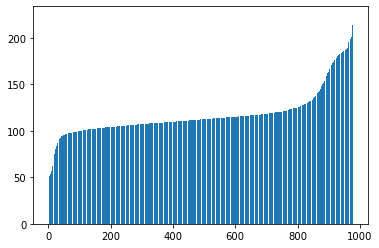

In [32]:
array = total_coordinate
particle_dist_list = []
for num in range(0,len(array)):

    x_ = array[num,0]        # 每個點的x_, y_值
    y_ = array[num,1]
    x = np.array([x_,y_])
    inds = knn(x, array, 6)   # 用 brute force找 k nearest neighbor
    
    inds = np.delete(inds, np.where(inds == num))
    inds = inds.tolist()
    single_particle_dist_list = []
    for j in range(0,len(inds)):
        point1 = [array[num,0],array[num,1]]
        point2 = [array[inds[j],0],array[inds[j],1]]
        
        #distance = math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
        single_particle_dist_list.append(math.dist(point1, point2))
    single_particle_dist_list.sort()
    #print(single_particle_dist_list)
    for ele in single_particle_dist_list:
#         if ele > 145:
#             single_particle_dist_list.remove(ele)
            
        particle_dist_list.append(ele)


# 由小到大 sort此list
particle_dist_list.sort()
particle_dist_list = list(dict.fromkeys(particle_dist_list))

# plot 長條圖
mean_particle_dist = np.mean(particle_dist_list)
std_particle_dist = np.std(particle_dist_list)
output = [i for i in range(1, len(particle_dist_list)+1)]
plt.bar(output,particle_dist_list)
print("mean particle dist : ",mean_particle_dist)
print("std particle dist : ",std_particle_dist)

(array([ 40.        ,  58.26858774,  76.53717548,  94.80576322,
        113.07435097, 131.34293871, 149.61152645, 167.88011419,
        186.14870193, 204.41728967, 222.68587741]),
 array([ 10.,  10.,  23., 478., 316.,  41.,  28.,  43.,  25.,   3.]))

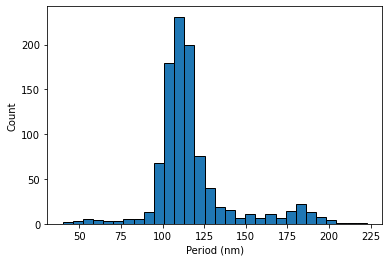

In [72]:
plt.hist(data, edgecolor='black', bins=30)  # 改變bin的大小可以改變多少數字range以內會被算為一組的數量
plt.xlabel("Period (nm)")
plt.ylabel("Count")
bins, n

####  binning 參考資料: 
1. https://www.statology.org/equal-frequency-binning-python/
2. https://www.statology.org/matplotlib-bin-size/